In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings
import seaborn as sns
import random
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("navianceScraper/csv.csv")

In [5]:
data['resultCode']=data['resultCode'].apply(lambda x: False if x ==2 else True)

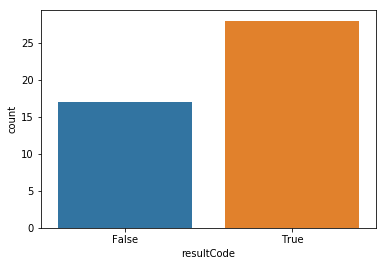

In [7]:
sns.countplot("resultCode", data=data)
plt.show()

In [9]:
data = data.drop(data[data.sat2400 <= 0].index)

train_y = data.resultCode
train_x = pd.DataFrame(data.drop(["resultCode", "type"], axis=1)).reset_index(drop=True)

In [17]:
print("Before OverSampling, counts of label '1': {}".format(sum(train_y==True)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(train_y==False)))

sm = SMOTE(random_state=2)
x_train_smote, y_train_smote = sm.fit_sample(train_x, train_y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==True)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==False)))

Before OverSampling, counts of label '1': 25
Before OverSampling, counts of label '0': 16 

After OverSampling, the shape of train_X: (50, 5)
After OverSampling, the shape of train_y: (50,) 

After OverSampling, counts of label '1': 25
After OverSampling, counts of label '0': 25


In [22]:
x_train_smote=pd.DataFrame(x_train_smote)
x_train_smote.columns =['act', 'sats', 'gpa', 'gpa_cumsum', 'sats_concorded']

In [29]:
x_train_smote.head()

,act,sats,gpa,gpa_cumsum,sats_concorded
0,21.0,1590.0,3.2844,3.1120,1150.0
1,21.0,1590.0,3.2844,3.1120,1150.0
2,0.0,2030.0,3.9161,3.9161,1430.0
3,0.0,2080.0,4.0000,4.0000,1450.0
4,0.0,1990.0,2.9241,2.9241,1400.0


In [ ]:
fig = plt.figure(figsize=(10,10))
for i, tar in enumerate(np.unique(y_train_smote)):
    import ipdb;ipdb.set_trace()
    Xi = x_train_smote[y_train_smote==tar]
    
    plt.scatter(Xi[:,1], Xi[:,2], label=tar)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()

> <ipython-input-35-b26fbed88b17>(4)<module>()
      3     import ipdb;ipdb.set_trace()
----> 4     Xi = x_train_smote[y_train_smote==tar]
      5 

ipdb> n
> <ipython-input-35-b26fbed88b17>(6)<module>()
      5 
----> 6     plt.scatter(Xi[:,1], Xi[:,2], label=tar)
      7 plt.xlabel('Petal length')

ipdb> Xi
          act         sats       gpa  gpa_cumsum  sats_concorded
4    0.000000  1990.000000  2.924100    2.924100     1400.000000
5    0.000000  1710.000000  3.235500    3.235500     1230.000000
7    0.000000  1630.000000  3.348200    3.348200     1180.000000
9    0.000000  2050.000000  3.045400    3.045400     1440.000000
13   0.000000  1640.000000  3.071400    3.071400     1180.000000
17   0.000000  1480.000000  3.419100    3.419100     1080.000000
19   0.000000  1630.000000  2.903500    2.903500     1180.000000
22   0.000000  1790.000000  3.135400    3.135400     1280.000000
25   0.000000  1730.000000  3.157800    3.157800     1240.000000
27   0.000000  1990.000000  3.434000   

In [34]:
y_train_smote

array([ True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False])